In [1]:
#MCMC code to fit y = m*x + c to the given (x_data, y_data)
#slope of the line m = tan(theta), where theta is the angle
# made by line with +x axis. The angle 'theta' is used for 
#sampling instead of m, because m varies from zero to infinity. 

In [2]:
import numpy as np
import matplotlib.pyplot as plt

In [3]:
#   Generate Data
theta_true = 0.5 #in radian
m_true = np.tan(theta_true) 
c_true = 1.0
#range of x variable
x1 = 0.0; x2 = 10

dx = 1.0
n_data = int((x2 - x1)/dx); print("ndata = ", n_data)

#'data' stores (x,y) data along with the errors on y
data = np.ndarray(shape = (n_data, 3))
#'true_data' stores model (x,y) i.e. y = tan(theta_true)*x + c_true
true_data = np.ndarray(shape = (n_data, 2))
#'inf_data' stores infered (x,y) i.e. y = tan(theta_mean)*x + c_mean
inf_data = np.ndarray(shape = (n_data, 2))

data[:,0] = np.arange(x1, x2, dx)
true_data[:,0] = np.arange(x1, x2, dx)
inf_data[:,0] = np.arange(x1, x2, dx)

ndata =  10


In [4]:
#generative model: our model of how y values in 'data' are generated.
def gen_model(theta, c, x):
    m = np.tan(theta)
    y = m*x + c
    return y

In [5]:
true_data[:,1] = gen_model(theta_true, c_true, data[:,0])
np.savetxt("true_data_1.dat", true_data)

In [6]:
#generate data with uncertainty
#for the purpose of our exercise we want to generate data from the generative model
# with some added uncertainty. This is the data we want to fit our model.
noise_sigma = 0.4
def n_data(x):
    s1 = gen_model(theta_true, c_true, x)
    ns = np.random.normal(s1, noise_sigma, size=None)
    return ns

In [7]:
data[:,1] = n_data(data[:,0])
#use following to have constant errorbar, otherwise comment.
data[:,2].fill(noise_sigma)

In [8]:
#to put some scatter in errorbars uncomment following three lines and comment above line.
#seed = 54321
#np.random.seed(seed)
#data[:,2] = np.random.normal(noise_sigma, 0.1, size = len(data[:,0]))
#data[:,2] = np.abs(true_data[:,1] - data[:,1])
np.savetxt("noisy_data_1.dat", data)

In [9]:
#define the log likelihood. Logarithm of likelihood is used to deal with very small 
#or very large numbers that may occure in the computation of likelihoods.

def log_likelihood(theta, c):
    lnL = -0.5*np.sum(((data[:,1] - gen_model(theta, c, data[:,0]))**2)/data[:,2]**2)
#    print(lnL)
    return lnL

In [10]:
#number of samples
nsample = 10000
#burn in sample
nburn=100

In [11]:
#Choose initial point to start the chain
#theta0 is in radian units
theta0 = 0.030
c0 = 1.5
thetai = theta0
ci = c0

In [12]:
#Parameters of proposal distribution
wtheta = 0.015
wc = 0.15
cov_matrix = np.ndarray(shape = (2,2))
cov_matrix[0,0] = wtheta**2; cov_matrix[0,1] = 0.0; cov_matrix[1,0] = 0.0; cov_matrix[1,1] = wc**2

In [13]:
#Seed for random number generation while sampling
seed1 = 1012345
np.random.seed(seed = seed1)

In [14]:
#array to store total sample
total_sample = np.ndarray(shape = (nsample, 3))
#array to store accepted sample
acptd_sample = np.ndarray(shape = (nsample, 3))

#array to store logarithm of likelihood
lnL = np.ndarray(shape = (nsample, 1))
lnL[0] = log_likelihood(thetai, ci)

In [15]:
#Following loop does the Markov Chain Monte Carlo (MCMC) sampling 
#of the distribution.

n_accept=0
for i in range(1, nsample,1):

#gaussian proposal distribution, zero correlation between two chains.
    thetastar, cstar = np.random.multivariate_normal(mean = np.asarray([thetai,ci]), cov = cov_matrix, size = None)
    temp_arr1 = np.asarray([i, thetastar, cstar])
    total_sample[i,:] = temp_arr1 

    lnL[i] = log_likelihood(thetastar, cstar)

#Metropolic rule
    if lnL[i] > lnL[i-1]:#accept proposed point
        thetai = thetastar
        ci = cstar
        acptd_sample[i,:] = np.asarray([i, thetai, ci])
        n_accept += 1
    else:
        alpha = np.random.random_sample(size = None)
        if lnL[i] - lnL[i-1] > np.log(alpha):#accept proposed point
            ci = cstar
            acptd_sample[i,:] = np.asarray([i, thetai, ci])
            n_accept += 1
        else:#reject proposed point
            #chain stays at the currant point.
            thetai = thetai
            ci = ci
            #Currant (not proposed) point is readded to the accepted sample.
            acptd_sample[i,:] = np.asarray([i, thetai, ci])
            lnL[i] = lnL[i-1]
        print("acceptance ratio:");print(n_accept/(1.0*i))


acceptance ratio:
0.0
acceptance ratio:
0.0
acceptance ratio:
0.0
acceptance ratio:
0.0
acceptance ratio:
0.16666666666666666
acceptance ratio:
0.14285714285714285
acceptance ratio:
0.125
acceptance ratio:
0.1111111111111111
acceptance ratio:
0.1
acceptance ratio:
0.4444444444444444
acceptance ratio:
0.5
acceptance ratio:
0.4782608695652174
acceptance ratio:
0.4583333333333333
acceptance ratio:
0.44
acceptance ratio:
0.4642857142857143
acceptance ratio:
0.53125
acceptance ratio:
0.5294117647058824
acceptance ratio:
0.5405405405405406
acceptance ratio:
0.5526315789473685
acceptance ratio:
0.5384615384615384
acceptance ratio:
0.55
acceptance ratio:
0.5681818181818182
acceptance ratio:
0.5869565217391305
acceptance ratio:
0.5957446808510638
acceptance ratio:
0.5918367346938775
acceptance ratio:
0.58
acceptance ratio:
0.5882352941176471
acceptance ratio:
0.5849056603773585
acceptance ratio:
0.5818181818181818
acceptance ratio:
0.5714285714285714
acceptance ratio:
0.5614035087719298
accepta

acceptance ratio:
0.5697115384615384
acceptance ratio:
0.5683453237410072
acceptance ratio:
0.5669856459330144
acceptance ratio:
0.5656324582338902
acceptance ratio:
0.5642857142857143
acceptance ratio:
0.5653206650831354
acceptance ratio:
0.5670588235294117
acceptance ratio:
0.5657276995305164
acceptance ratio:
0.5667447306791569
acceptance ratio:
0.5687645687645687
acceptance ratio:
0.568445475638051
acceptance ratio:
0.5704387990762124
acceptance ratio:
0.5691244239631337
acceptance ratio:
0.5678160919540229
acceptance ratio:
0.5665137614678899
acceptance ratio:
0.5652173913043478
acceptance ratio:
0.5639269406392694
acceptance ratio:
0.5649202733485194
acceptance ratio:
0.5668934240362812
acceptance ratio:
0.5688487584650113
acceptance ratio:
0.5698198198198198
acceptance ratio:
0.5707865168539326
acceptance ratio:
0.5727069351230425
acceptance ratio:
0.5714285714285714
acceptance ratio:
0.5723830734966593
acceptance ratio:
0.5739514348785872
acceptance ratio:
0.5726872246696035
ac

acceptance ratio:
0.578544061302682
acceptance ratio:
0.5790816326530612
acceptance ratio:
0.5799492385786802
acceptance ratio:
0.5804816223067174
acceptance ratio:
0.5808080808080808
acceptance ratio:
0.5813366960907944
acceptance ratio:
0.5806045340050378
acceptance ratio:
0.5811320754716981
acceptance ratio:
0.5804020100502513
acceptance ratio:
0.5802005012531328
acceptance ratio:
0.5794743429286608
acceptance ratio:
0.58
acceptance ratio:
0.5808457711442786
acceptance ratio:
0.5801242236024845
acceptance ratio:
0.5806451612903226
acceptance ratio:
0.5804455445544554
acceptance ratio:
0.5812807881773399
acceptance ratio:
0.5805658056580566
acceptance ratio:
0.581081081081081
acceptance ratio:
0.5831295843520783
acceptance ratio:
0.5836385836385837
acceptance ratio:
0.5829268292682926
acceptance ratio:
0.5844471445929527
acceptance ratio:
0.5837378640776699
acceptance ratio:
0.583030303030303
acceptance ratio:
0.5835351089588378
acceptance ratio:
0.5828295042321644
acceptance ratio:


acceptance ratio:
0.5864661654135338
acceptance ratio:
0.5859766277128547
acceptance ratio:
0.585487906588824
acceptance ratio:
0.585
acceptance ratio:
0.5848585690515807
acceptance ratio:
0.5843724023275145
acceptance ratio:
0.584717607973422
acceptance ratio:
0.5842323651452282
acceptance ratio:
0.5845771144278606
acceptance ratio:
0.584092792046396
acceptance ratio:
0.5847808105872622
acceptance ratio:
0.584297520661157
acceptance ratio:
0.5845012366034625
acceptance ratio:
0.5851851851851851
acceptance ratio:
0.5855263157894737
acceptance ratio:
0.5858668857847165
acceptance ratio:
0.5865463494667761
acceptance ratio:
0.5860655737704918
acceptance ratio:
0.5855855855855856
acceptance ratio:
0.5864600326264274
acceptance ratio:
0.5859820700896495
acceptance ratio:
0.5855048859934854
acceptance ratio:
0.5858421480878763
acceptance ratio:
0.5853658536585366
acceptance ratio:
0.5848903330625508
acceptance ratio:
0.5844155844155844
acceptance ratio:
0.583941605839416
acceptance ratio:
0

acceptance ratio:
0.5826524198617222
acceptance ratio:
0.582286432160804
acceptance ratio:
0.5825486503452605
acceptance ratio:
0.5821831869510665
acceptance ratio:
0.5824451410658307
acceptance ratio:
0.5820802005012531
acceptance ratio:
0.5823418910457107
acceptance ratio:
0.5819774718397998
acceptance ratio:
0.5822388993120701
acceptance ratio:
0.5821361648969394
acceptance ratio:
0.5820336868371803
acceptance ratio:
0.5816708229426434
acceptance ratio:
0.5813084112149532
acceptance ratio:
0.5809464508094645
acceptance ratio:
0.581207218419415
acceptance ratio:
0.5808457711442786
acceptance ratio:
0.5813664596273292
acceptance ratio:
0.5816263190564867
acceptance ratio:
0.5818858560794045
acceptance ratio:
0.5815251084934904
acceptance ratio:
0.5811648079306072
acceptance ratio:
0.5808049535603715
acceptance ratio:
0.5804455445544554
acceptance ratio:
0.5807050092764379
acceptance ratio:
0.5803461063040791
acceptance ratio:
0.5799876466954911
acceptance ratio:
0.5802469135802469
acc

acceptance ratio:
0.5818363273453094
acceptance ratio:
0.5817547357926222
acceptance ratio:
0.5819631290483308
acceptance ratio:
0.5823792931806869
acceptance ratio:
0.582089552238806
acceptance ratio:
0.5818000994530085
acceptance ratio:
0.5822155986090413
acceptance ratio:
0.5821339950372209
acceptance ratio:
0.5822596630327056
acceptance ratio:
0.5819712729073799
acceptance ratio:
0.5821782178217821
acceptance ratio:
0.5818901533894112
acceptance ratio:
0.5818091942659417
acceptance ratio:
0.5820158102766798
acceptance ratio:
0.5817283950617284
acceptance ratio:
0.5819348469891412
acceptance ratio:
0.5823471400394478
acceptance ratio:
0.5820601281419419
acceptance ratio:
0.5824716888232397
acceptance ratio:
0.5828824397442204
acceptance ratio:
0.5825958702064897
acceptance ratio:
0.5828009828009828
acceptance ratio:
0.5827196858124694
acceptance ratio:
0.5824337585868499
acceptance ratio:
0.5823529411764706
acceptance ratio:
0.5820676139147477
acceptance ratio:
0.5817825661116552
ac

acceptance ratio:
0.5873280533555648
acceptance ratio:
0.5875
acceptance ratio:
0.5874271440466278
acceptance ratio:
0.5871826883062838
acceptance ratio:
0.5871101871101871
acceptance ratio:
0.5868661679135495
acceptance ratio:
0.586622351474865
acceptance ratio:
0.5863787375415282
acceptance ratio:
0.5864786395686438
acceptance ratio:
0.5862354892205639
acceptance ratio:
0.5864069622876088
acceptance ratio:
0.5861640430820215
acceptance ratio:
0.5859213250517599
acceptance ratio:
0.5856788079470199
acceptance ratio:
0.5854364915184113
acceptance ratio:
0.5856079404466501
acceptance ratio:
0.5853658536585366
acceptance ratio:
0.5855371900826446
acceptance ratio:
0.5857083849648905
acceptance ratio:
0.5856376392901362
acceptance ratio:
0.5853960396039604
acceptance ratio:
0.5855670103092784
acceptance ratio:
0.5859085290482077
acceptance ratio:
0.585667215815486
acceptance ratio:
0.58559670781893
acceptance ratio:
0.5855263157894737
acceptance ratio:
0.5856966707768188
acceptance ratio:

acceptance ratio:
0.5859175483400219
acceptance ratio:
0.5857038657913931
acceptance ratio:
0.5860058309037901
acceptance ratio:
0.585792349726776
acceptance ratio:
0.5863950527464532
acceptance ratio:
0.5864825581395349
acceptance ratio:
0.586632764257174
acceptance ratio:
0.5865698729582577
acceptance ratio:
0.5863570391872278
acceptance ratio:
0.5861443598113892
acceptance ratio:
0.5862944162436549
acceptance ratio:
0.5864443638999638
acceptance ratio:
0.5865942028985507
acceptance ratio:
0.5863817457442956
acceptance ratio:
0.5861694424330196
acceptance ratio:
0.5861070911722142
acceptance ratio:
0.5858951175406871
acceptance ratio:
0.5856832971800434
acceptance ratio:
0.5858330321647994
acceptance ratio:
0.585621387283237
acceptance ratio:
0.5854098952690502
acceptance ratio:
0.5857091302778781
acceptance ratio:
0.5863063063063063
acceptance ratio:
0.5866042491897732
acceptance ratio:
0.5867530597552196
acceptance ratio:
0.586541921554516
acceptance ratio:
0.5866906474820144
accep

acceptance ratio:
0.583117723156533
acceptance ratio:
0.5829291949563531
acceptance ratio:
0.5827407886231416
acceptance ratio:
0.5825525040387722
acceptance ratio:
0.5823643410852714
acceptance ratio:
0.5823111684958038
acceptance ratio:
0.5824459503065506
acceptance ratio:
0.582392776523702
acceptance ratio:
0.5822050290135397
acceptance ratio:
0.5823396712858524
acceptance ratio:
0.5822866344605475
acceptance ratio:
0.5824211204121056
acceptance ratio:
0.5825555197940135
acceptance ratio:
0.582824059183017
acceptance ratio:
0.5826366559485531
acceptance ratio:
0.5824493731918997
acceptance ratio:
0.582396402184388
acceptance ratio:
0.5825305073859988
acceptance ratio:
0.5824775353016688
acceptance ratio:
0.5822906641000962
acceptance ratio:
0.5824246311738294
acceptance ratio:
0.5825585123436999
acceptance ratio:
0.5823717948717949
acceptance ratio:
0.5821851970522268
acceptance ratio:
0.5824527697726545
acceptance ratio:
0.5826670930604413
acceptance ratio:
0.5824808184143222
accep

acceptance ratio:
0.5858263142608191
acceptance ratio:
0.5857764876632802
acceptance ratio:
0.5860168262257035
acceptance ratio:
0.58584686774942
acceptance ratio:
0.5859669469411424
acceptance ratio:
0.5863267670915412
acceptance ratio:
0.5864465682015638
acceptance ratio:
0.5862767805442964
acceptance ratio:
0.5863965267727931
acceptance ratio:
0.5866358113971651
acceptance ratio:
0.5864661654135338
acceptance ratio:
0.586585718415727
acceptance ratio:
0.5867052023121387
acceptance ratio:
0.5865356833285178
acceptance ratio:
0.5868937644341802
acceptance ratio:
0.5871321407963069
acceptance ratio:
0.5873702422145328
acceptance ratio:
0.5872009224560392
acceptance ratio:
0.5876763604952491
acceptance ratio:
0.5877950489349453
acceptance ratio:
0.5881507046304285
acceptance ratio:
0.5885057471264368
acceptance ratio:
0.5883366848606723
acceptance ratio:
0.5881677197013211
acceptance ratio:
0.5879988515647431
acceptance ratio:
0.5878300803673938
acceptance ratio:
0.5880665519219737
acce

acceptance ratio:
0.5878080415045396
acceptance ratio:
0.5876556016597511
acceptance ratio:
0.5875032408607727
acceptance ratio:
0.5873509590461379
acceptance ratio:
0.5874578906452449
acceptance ratio:
0.5876715876715877
acceptance ratio:
0.5877783531848783
acceptance ratio:
0.5876261972560186
acceptance ratio:
0.5877329192546584
acceptance ratio:
0.5878395860284605
acceptance ratio:
0.5877941556762348
acceptance ratio:
0.5876421923474664
acceptance ratio:
0.587748772292582
acceptance ratio:
0.5875968992248062
acceptance ratio:
0.5874451046241281
acceptance ratio:
0.5872933884297521
acceptance ratio:
0.587141750580945
acceptance ratio:
0.5869901910170366
acceptance ratio:
0.5868387096774194
acceptance ratio:
0.586687306501548
acceptance ratio:
0.5867939128191901
acceptance ratio:
0.5867491621551947
acceptance ratio:
0.5868556701030928
acceptance ratio:
0.5870685213807316
acceptance ratio:
0.5869173319598249
acceptance ratio:
0.5870236869207003
acceptance ratio:
0.5869788986103963
acce

acceptance ratio:
0.5881796690307328
acceptance ratio:
0.5880406523280548
acceptance ratio:
0.5882352941176471
acceptance ratio:
0.5880963627775153
acceptance ratio:
0.5882908404154863
acceptance ratio:
0.588346308091531
acceptance ratio:
0.5882075471698113
acceptance ratio:
0.5884016973125884
acceptance ratio:
0.5884987037473486
acceptance ratio:
0.5884570082449941
acceptance ratio:
0.5885539331135186
acceptance ratio:
0.5884153520131857
acceptance ratio:
0.5886090844904683
acceptance ratio:
0.5885673959068455
acceptance ratio:
0.5886641580432738
acceptance ratio:
0.5885257465318599
acceptance ratio:
0.5885808270676691
acceptance ratio:
0.5886774723984026
acceptance ratio:
0.5888706269077248
acceptance ratio:
0.5887323943661972
acceptance ratio:
0.5889253871421868
acceptance ratio:
0.5887872390335445
acceptance ratio:
0.5889800703399766
acceptance ratio:
0.5888420065635256
acceptance ratio:
0.5887040074994141
acceptance ratio:
0.5887587822014052
acceptance ratio:
0.5886209318660736
ac

acceptance ratio:
0.5896379796228051
acceptance ratio:
0.5895101863892501
acceptance ratio:
0.5895991332611051
acceptance ratio:
0.5897380385364798
acceptance ratio:
0.5898268398268398
acceptance ratio:
0.5899156026834018
acceptance ratio:
0.5897879705755085
acceptance ratio:
0.5899653979238755
acceptance ratio:
0.5900540540540541
acceptance ratio:
0.5900151285930408
acceptance ratio:
0.5901037165082109
acceptance ratio:
0.5899762367682004
acceptance ratio:
0.5899373785359534
acceptance ratio:
0.5900259067357513
acceptance ratio:
0.5901143967191884
acceptance ratio:
0.5899870522227018
acceptance ratio:
0.5900755124056095
acceptance ratio:
0.5902523183092516
acceptance ratio:
0.5905172413793104
acceptance ratio:
0.5906054729584141
acceptance ratio:
0.5907818220977816
acceptance ratio:
0.5909580193756727
acceptance ratio:
0.5911340649881645
acceptance ratio:
0.5912220309810671
acceptance ratio:
0.5910948591094859
acceptance ratio:
0.5913585554600171
acceptance ratio:
0.5913192952299098
a

acceptance ratio:
0.5945189037807561
acceptance ratio:
0.5944
acceptance ratio:
0.5942811437712457
acceptance ratio:
0.5944433339996003
acceptance ratio:
0.5944055944055944
acceptance ratio:
0.5942868557730723
acceptance ratio:
0.5941681645696025
acceptance ratio:
0.5941305649830305
acceptance ratio:
0.5940929954100977
acceptance ratio:
0.593974461292897
acceptance ratio:
0.5938559744663874
acceptance ratio:
0.5940179461615155
acceptance ratio:
0.5938995215311005
acceptance ratio:
0.59386209645277
acceptance ratio:
0.5939430165371588
acceptance ratio:
0.5938247011952191
acceptance ratio:
0.5937064329814777
acceptance ratio:
0.5936691220386223
acceptance ratio:
0.59375
acceptance ratio:
0.5937126939912455
acceptance ratio:
0.5936754176610979
acceptance ratio:
0.593557367269835
acceptance ratio:
0.593638170974155
acceptance ratio:
0.5935201749155238
acceptance ratio:
0.5934022257551669
acceptance ratio:
0.5933651172030194
acceptance ratio:
0.5932472691161867
acceptance ratio:
0.593328038

acceptance ratio:
0.593027591349739
acceptance ratio:
0.5929170549860205
acceptance ratio:
0.5929929183749534
acceptance ratio:
0.5928824296627538
acceptance ratio:
0.5929236499068902
acceptance ratio:
0.5928132563768386
acceptance ratio:
0.5928890543559195
acceptance ratio:
0.5927787083565978
acceptance ratio:
0.5929302325581395
acceptance ratio:
0.5930059523809523
acceptance ratio:
0.5929713648196355
acceptance ratio:
0.5928611266034579
acceptance ratio:
0.5929368029739777
acceptance ratio:
0.5930880713489409
acceptance ratio:
0.5930534918276374
acceptance ratio:
0.5931290622098422
acceptance ratio:
0.5930189379873747
acceptance ratio:
0.5929088546500836
acceptance ratio:
0.5929844097995546
acceptance ratio:
0.5930599369085173
acceptance ratio:
0.5930254127249119
acceptance ratio:
0.5931008902077152
acceptance ratio:
0.5930663700407861
acceptance ratio:
0.593141797961075
acceptance ratio:
0.5932171979243884
acceptance ratio:
0.5932925699462664
acceptance ratio:
0.5932580107427301
acc

acceptance ratio:
0.594683808200139
acceptance ratio:
0.5945805106826472
acceptance ratio:
0.5946509204584925
acceptance ratio:
0.5945476645250911
acceptance ratio:
0.5946180555555556
acceptance ratio:
0.594585213467546
acceptance ratio:
0.5945523941707148
acceptance ratio:
0.5946227233304423
acceptance ratio:
0.5946930280957337
acceptance ratio:
0.594730455884902
acceptance ratio:
0.5949410949410949
acceptance ratio:
0.5949082092137167
acceptance ratio:
0.5948051948051948
acceptance ratio:
0.5949454734291154
acceptance ratio:
0.5948425060574594
acceptance ratio:
0.5947395743208167
acceptance ratio:
0.59487977858502
acceptance ratio:
0.5948469652429534
acceptance ratio:
0.5948842032492223
acceptance ratio:
0.5948514167242571
acceptance ratio:
0.5947486612541026
acceptance ratio:
0.5946459412780656
acceptance ratio:
0.5947159385252979
acceptance ratio:
0.59478591160221
acceptance ratio:
0.5946832383911618
acceptance ratio:
0.5945806006213324
acceptance ratio:
0.5946505608283003
acceptan

acceptance ratio:
0.5940513155744402
acceptance ratio:
0.5939542483660131
acceptance ratio:
0.5938572128737134
acceptance ratio:
0.5939235543939889
acceptance ratio:
0.5938928804702809
acceptance ratio:
0.5937959183673469
acceptance ratio:
0.5937653011261629
acceptance ratio:
0.5936684073107049
acceptance ratio:
0.5937347038668624
acceptance ratio:
0.5938672320991681
acceptance ratio:
0.5937703848662753
acceptance ratio:
0.5938366215555193
acceptance ratio:
0.5937398108901206
acceptance ratio:
0.5938060309698452
acceptance ratio:
0.5938722294654498
acceptance ratio:
0.5940706955530216
acceptance ratio:
0.5941061543471182
acceptance ratio:
0.5941722285528244
acceptance ratio:
0.5942076147087536
acceptance ratio:
0.5942736294127217
acceptance ratio:
0.5944055944055944
acceptance ratio:
0.5943089430894309
acceptance ratio:
0.5942123231994798
acceptance ratio:
0.5941157347204161
acceptance ratio:
0.5942476438089048
acceptance ratio:
0.5942829299983758
acceptance ratio:
0.5943488145501786
a

acceptance ratio:
0.5941009133103758
acceptance ratio:
0.5940119760479042
acceptance ratio:
0.5939230654093699
acceptance ratio:
0.5938341813828195
acceptance ratio:
0.5938949573544815
acceptance ratio:
0.5939557151406344
acceptance ratio:
0.5940771761890518
acceptance ratio:
0.5941378794676238
acceptance ratio:
0.594049043062201
acceptance ratio:
0.5939602332187173
acceptance ratio:
0.5938714499252615
acceptance ratio:
0.5939928272564255
acceptance ratio:
0.5939040788883908
acceptance ratio:
0.5938153570361517
acceptance ratio:
0.5941185251530079
acceptance ratio:
0.5941509997015816
acceptance ratio:
0.5942115470684768
acceptance ratio:
0.594272076372315
acceptance ratio:
0.5942439606322696
acceptance ratio:
0.594304458028925
acceptance ratio:
0.5942158616577221
acceptance ratio:
0.5942763452079296
acceptance ratio:
0.5943087008343266
acceptance ratio:
0.5942201698197527
acceptance ratio:
0.5941316651772416
acceptance ratio:
0.5941921072226359
acceptance ratio:
0.5941036331149494
acce

acceptance ratio:
0.5911014057595196
acceptance ratio:
0.5910207423580786
acceptance ratio:
0.5909401009687543
acceptance ratio:
0.5909959072305594
acceptance ratio:
0.5909152912290274
acceptance ratio:
0.5908346972176759
acceptance ratio:
0.5909462776111263
acceptance ratio:
0.5909214830970556
acceptance ratio:
0.5910329790133552
acceptance ratio:
0.5909524458373075
acceptance ratio:
0.591008174386921
acceptance ratio:
0.5909833832743122
acceptance ratio:
0.5909029007217759
acceptance ratio:
0.590958605664488
acceptance ratio:
0.5908781484002723
acceptance ratio:
0.5907977130411108
acceptance ratio:
0.5907172995780591
acceptance ratio:
0.5907729994556342
acceptance ratio:
0.5908286841747177
acceptance ratio:
0.5908843537414966
acceptance ratio:
0.5909956474428727
acceptance ratio:
0.5910512715898273
acceptance ratio:
0.5909709001903726
acceptance ratio:
0.5908905506458192
acceptance ratio:
0.5908102229472539
acceptance ratio:
0.5908658420551856
acceptance ratio:
0.5907855395487904
acc

acceptance ratio:
0.5919031502212966
acceptance ratio:
0.5918261095926071
acceptance ratio:
0.5918792295679334
acceptance ratio:
0.5918022121014964
acceptance ratio:
0.591855321363518
acceptance ratio:
0.5917783270456615
acceptance ratio:
0.5919906384085295
acceptance ratio:
0.5919136765470618
acceptance ratio:
0.5918897842474655
acceptance ratio:
0.591995841995842
acceptance ratio:
0.5919719407638347
acceptance ratio:
0.5920249383036758
acceptance ratio:
0.5920779220779221
acceptance ratio:
0.5920010388261264
acceptance ratio:
0.5921069713098792
acceptance ratio:
0.5921359979236959
acceptance ratio:
0.5920591669910471
acceptance ratio:
0.5919823559937727
acceptance ratio:
0.591958495460441
acceptance ratio:
0.5918817274024122
acceptance ratio:
0.591804979253112
acceptance ratio:
0.5917282510047971
acceptance ratio:
0.5916515426497277
acceptance ratio:
0.5917044718081659
acceptance ratio:
0.5917573872472783
acceptance ratio:
0.5916807049371517
acceptance ratio:
0.5916040424980565
accep

acceptance ratio:
0.5916583416583416
acceptance ratio:
0.5915844674740917
acceptance ratio:
0.5915106117353308
acceptance ratio:
0.5915616027961553
acceptance ratio:
0.5916125811283075
acceptance ratio:
0.5917144996256551
acceptance ratio:
0.5916916167664671
acceptance ratio:
0.591617812149183
acceptance ratio:
0.5915440259416314
acceptance ratio:
0.5916458852867831
acceptance ratio:
0.5915721231766613
acceptance ratio:
0.5914983794564946
acceptance ratio:
0.5916001994017946
acceptance ratio:
0.5915264797507788
acceptance ratio:
0.5915036750965491
acceptance ratio:
0.5914808818034625
acceptance ratio:
0.5914072229140722
acceptance ratio:
0.5913335823683228
acceptance ratio:
0.5912599601593626
acceptance ratio:
0.5911863562803436
acceptance ratio:
0.5912372417226787
acceptance ratio:
0.5911636589919104
acceptance ratio:
0.5912145345943255
acceptance ratio:
0.5912426918770991
acceptance ratio:
0.5911691542288557
acceptance ratio:
0.5910956348712847
acceptance ratio:
0.5910221337975627
ac

acceptance ratio:
0.5903513996426444
acceptance ratio:
0.5903298797189472
acceptance ratio:
0.5902595856156228
acceptance ratio:
0.5903571428571428
acceptance ratio:
0.5904059040590406
acceptance ratio:
0.5903843865286207
acceptance ratio:
0.5904331270823417
acceptance ratio:
0.5903628792385485
acceptance ratio:
0.5904116107542232
acceptance ratio:
0.5903413821815154
acceptance ratio:
0.5902711703139867
acceptance ratio:
0.5903686087990487
acceptance ratio:
0.5902984187373678
acceptance ratio:
0.5903471231573942
acceptance ratio:
0.590276952335671
acceptance ratio:
0.5902067981934871
acceptance ratio:
0.590136660724896
acceptance ratio:
0.5902340501366282
acceptance ratio:
0.5902612826603325
acceptance ratio:
0.5903099394371215
acceptance ratio:
0.5903585846592259
acceptance ratio:
0.5902884957853496
acceptance ratio:
0.5903857566765579
acceptance ratio:
0.5903156895323998
acceptance ratio:
0.5903428639221735
acceptance ratio:
0.5902728351126928
acceptance ratio:
0.5903214328074962
acc

acceptance ratio:
0.5920753860127157
acceptance ratio:
0.5921216937223295
acceptance ratio:
0.5921679909194097
acceptance ratio:
0.5921007831120191
acceptance ratio:
0.5920335905583296
acceptance ratio:
0.5920127070569549
acceptance ratio:
0.591991833030853
acceptance ratio:
0.5920381082000681
acceptance ratio:
0.5919709684735768
acceptance ratio:
0.5919038439732396
acceptance ratio:
0.5919963722933907
acceptance ratio:
0.5919292677397415
acceptance ratio:
0.5918621783973705
acceptance ratio:
0.591795104261106
acceptance ratio:
0.591728045325779
acceptance ratio:
0.5916610015862225
acceptance ratio:
0.5916402356139556
acceptance ratio:
0.5916864877109526
acceptance ratio:
0.5917327293318233
acceptance ratio:
0.5916657230211754
acceptance ratio:
0.5917581795539454
acceptance ratio:
0.5917374080362195
acceptance ratio:
0.5918298064954169
acceptance ratio:
0.5919683257918552
acceptance ratio:
0.5919013686234589
acceptance ratio:
0.5918344266003167
acceptance ratio:
0.5918805835123827
acce

acceptance ratio:
0.5924921341000325
acceptance ratio:
0.5925363419396832
acceptance ratio:
0.5924720685540731
acceptance ratio:
0.5924078091106291
acceptance ratio:
0.5924962047278247
acceptance ratio:
0.5924319635693375
acceptance ratio:
0.5923677363399826
acceptance ratio:
0.5923035230352304
acceptance ratio:
0.5922393236505528
acceptance ratio:
0.5921751381814241
acceptance ratio:
0.5922635171741251
acceptance ratio:
0.5922435272451522
acceptance ratio:
0.5921793760831889
acceptance ratio:
0.592223545976389
acceptance ratio:
0.592267706302794
acceptance ratio:
0.5924001299123092
acceptance ratio:
0.592488364541617
acceptance ratio:
0.5924683475814306
acceptance ratio:
0.5924042415061676
acceptance ratio:
0.5923401493021746
acceptance ratio:
0.5922760709649503
acceptance ratio:
0.5922120064899946
acceptance ratio:
0.5921479558728099
acceptance ratio:
0.5920839191089002
acceptance ratio:
0.592128027681661
acceptance ratio:
0.592064006919667
acceptance ratio:
0.5921081081081081
accept

acceptance ratio:
0.5926157046281851
acceptance ratio:
0.5926580698835274
acceptance ratio:
0.5928274428274428
acceptance ratio:
0.5927658247583412
acceptance ratio:
0.592704219496986
acceptance ratio:
0.5927465447365686
acceptance ratio:
0.5926849542809642
acceptance ratio:
0.5926656970704343
acceptance ratio:
0.5927080087254596
acceptance ratio:
0.5926464478604071
acceptance ratio:
0.5925848997819089
acceptance ratio:
0.5926272066458982
acceptance ratio:
0.5926695047243277
acceptance ratio:
0.592754074535451
acceptance ratio:
0.5928386092371563
acceptance ratio:
0.5927770859277709
acceptance ratio:
0.5927155753865311
acceptance ratio:
0.5928000829961614
acceptance ratio:
0.5927385892116183
acceptance ratio:
0.5927193528313628
acceptance ratio:
0.5926578865498289
acceptance ratio:
0.5927001244296972
acceptance ratio:
0.5926386728875065
acceptance ratio:
0.5927653399668324
acceptance ratio:
0.5927039071406364
acceptance ratio:
0.5926424870466321
acceptance ratio:
0.5926846958864367
acc

acceptance ratio:
0.5927370948379351
acceptance ratio:
0.592777833350005


In [16]:
#Compute and print the summary of sampled distribution.
theta_mean = np.mean(acptd_sample[nburn:,1]); c_mean = np.mean(acptd_sample[nburn:,2])
print("theta mean, std dev:"); print(np.mean(acptd_sample[nburn:,1])); 
print(np.sqrt(np.var(acptd_sample[nburn:,1])) )
print("c mean, std dev:"); print(np.mean(acptd_sample[nburn:,2]))
print(np.sqrt(np.var(acptd_sample[nburn:,2])))
#print "covariance:", np.cov(acptd_sample[nburn:,1:3], y = None, rowvar=0, bias=0, ddof=None)

theta mean, std dev:
0.5112920470451335
0.019439522563896007
c mean, std dev:
0.8874303423172297
0.18281561683596606


In [17]:
inf_data[:,1] = gen_model(theta_mean, c_mean, data[:,0])
np.savetxt("inferred_data.dat", inf_data)

np.savetxt("total_proposed_sample.dat", total_sample)
np.savetxt("accepted_sample.dat", acptd_sample)

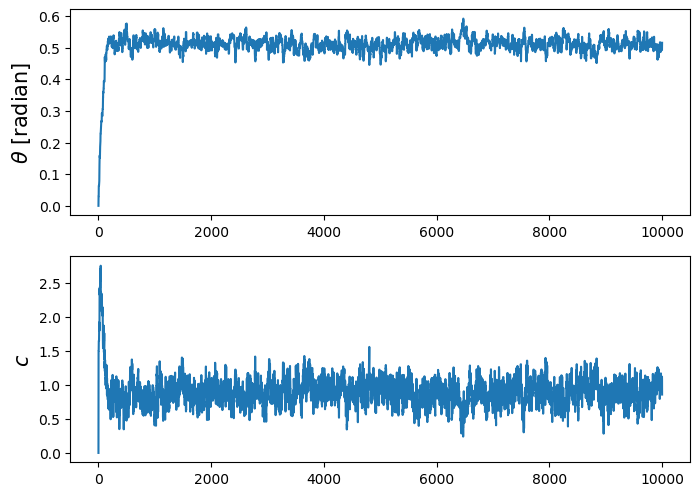

In [18]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plot1 = plt.plot(acptd_sample[:,0], acptd_sample[:,1])
plt.ylabel(r"$\theta$ [radian]", fontsize = 15)
plt.subplot(2,1,2)
plot2 = plt.plot(acptd_sample[:,0], acptd_sample[:,2])
plt.ylabel(r"$c$", fontsize = 15)
#plt.savefig("chain.pdf")
plt.show()

/home/shabbir/anaconda3/lib/python3.7/site-packages/ipykernel_launcher.py:2: MatplotlibDeprecationWarning: The 'normed' parameter of hist2d() has been renamed 'density' since Matplotlib 3.1; support for the old name will be dropped in 3.3.
  


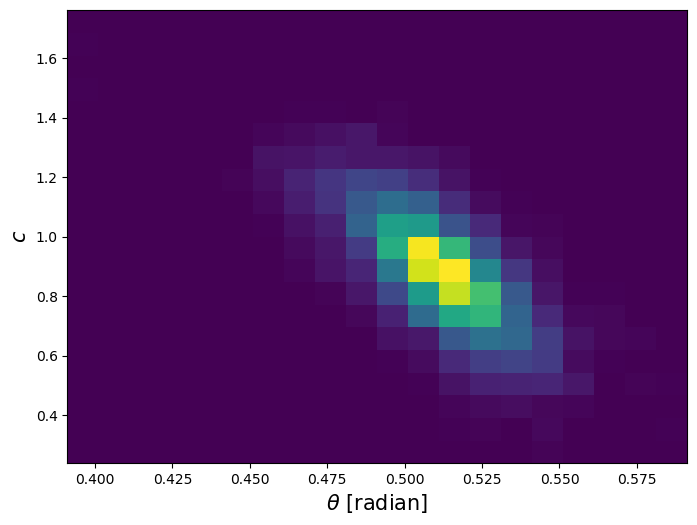

In [19]:
plt.figure(figsize=(8,6), dpi=100)
plot4 = plt.hist2d(acptd_sample[nburn:,1], acptd_sample[nburn:,2], bins=20, normed=False)
plt.xlabel(r"$\theta$ [radian]", fontsize = 15)
plt.ylabel(r"$c$", fontsize = 15)
#plt.savefig("twoD_histogram.pdf")
plt.show()

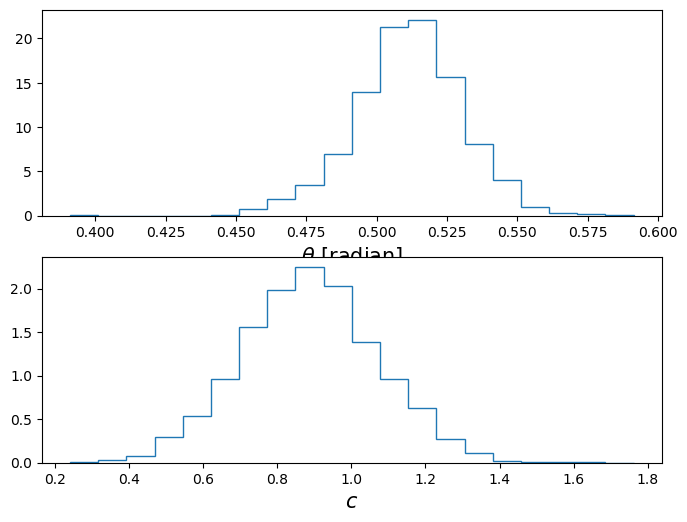

In [22]:
plt.figure(figsize=(8,6), dpi=100)
plt.subplot(2,1,1)
plot5 = plt.hist(acptd_sample[nburn:,1], bins = 20, density=True, histtype='step')
plt.xlabel(r"$\theta$ [radian]", fontsize = 15)
plt.subplot(2,1,2)
plot6 = plt.hist(acptd_sample[nburn:,2], bins = 20, density=True, histtype='step')
plt.xlabel(r"$c$", fontsize = 15)
#plt.savefig("oneD_histogram.pdf")
plt.show()

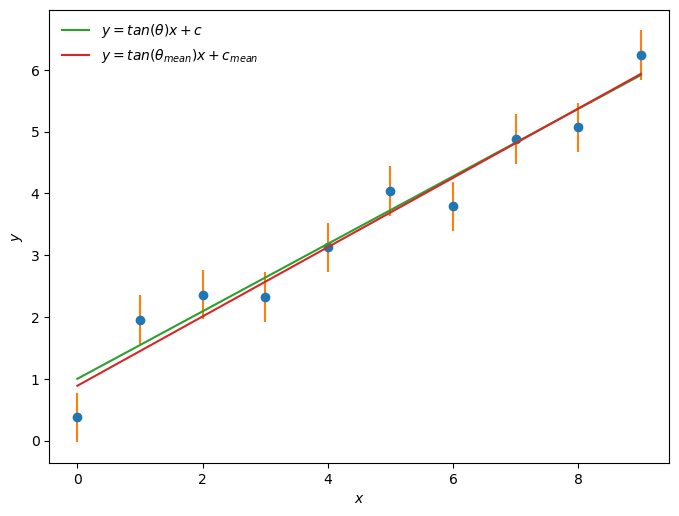

In [21]:
plt.figure(figsize=(8,6), dpi=100)
plot70 = plt.plot(data[:,0], data[:,1], marker = 'o', linestyle = 'none')
plot7 = plt.errorbar(data[:,0], data[:,1], yerr=data[:,2], linestyle = 'none')
plot8 = plt.plot(true_data[:,0], true_data[:,1], label = r"$y = tan(\theta)x + c$")
plot9 = plt.plot(inf_data[:,0], inf_data[:,1], label = r"$y = tan(\theta_{mean})x + c_{mean}$")
plt.xlabel(r"$x$")
plt.ylabel(r"$y$")
plt.legend(loc='upper left', frameon = False)

#plt.savefig("data_with_errorbar.pdf")
plt.show()